**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

#### Execute the below cell to load the datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Loading data
#Read books.csv and load books dataset

books = pd.read_csv("books.csv", sep=";", error_bad_lines=False, warn_bad_lines=False, encoding="latin-1",
                    low_memory=False)
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS',
                 'imageUrlM', 'imageUrlL']

In [3]:
#Read users.csv and load users dataset

users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

In [4]:
#Read ratings.csv and load ratings dataset

ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

### Check no.of records and features given in each dataset
hint - check shape

In [5]:
print("Shape of books DataFrame:", books.shape)

Shape of books DataFrame: (271360, 8)


In [6]:
print("Shape of users DataFrame:", users.shape)

Shape of users DataFrame: (278858, 3)


In [7]:
print("Shape of ratings DataFrame:", ratings.shape)

Shape of ratings DataFrame: (1149780, 3)


## Exploring books dataset

In [8]:
books.head(5)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [9]:
books.tail(5)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [10]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
imageUrlS            object
imageUrlM            object
imageUrlL            object
dtype: object

In [11]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
ISBN                 271360 non-null object
bookTitle            271360 non-null object
bookAuthor           271359 non-null object
yearOfPublication    271360 non-null object
publisher            271358 non-null object
imageUrlS            271360 non-null object
imageUrlM            271360 non-null object
imageUrlL            271357 non-null object
dtypes: object(8)
memory usage: 16.6+ MB


### Drop last three columns containing image URLs which will not be required for analysis

In [12]:
books.drop(['imageUrlS','imageUrlM', 'imageUrlL'], axis=1, inplace=True)

In [13]:
books.head(2)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [14]:
print(books.shape, books.columns)

(271360, 5) Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher'], dtype='object')


**yearOfPublication**

### Check unique values of yearOfPublication


In [15]:
books['yearOfPublication'].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', 'DK Publishing Inc', 'Gallimard', '1909',
       

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [16]:
#Rows having 'DK Publishing Inc' as yearOfPublication

books[books['yearOfPublication'] == 'DK Publishing Inc']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [17]:
#Rows having 'Gallimard' as yearOfPublication

books[books['yearOfPublication'] == 'Gallimard']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [18]:
#Drop the rows having 'DK Publishing Inc' as yearOfPublication

books = books.drop(books[books['yearOfPublication'] == 'DK Publishing Inc'].index, axis=0)

In [19]:
#Check that the rows are dropped.

books[books['yearOfPublication'] == 'DK Publishing Inc']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


In [20]:
#Drop the rows having 'Gallimard'as yearOfPublication

books = books.drop(books[books['yearOfPublication'] == 'Gallimard'].index, axis=0)

In [21]:
#Check that the rows are dropped.

books[books['yearOfPublication'] == 'Gallimard']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


### Change the datatype of yearOfPublication to 'int'

In [22]:
books['yearOfPublication'] = books['yearOfPublication'].astype('int64')

In [23]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int64
publisher            object
dtype: object

In [24]:
print(sorted(books['yearOfPublication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


### All the years from 2020 to 2050 are invalid as they are future years. For all thes invalid entries (including 0),convert these to NaNs, and then replace them with median of the year of Publication

In [25]:
print(books['yearOfPublication'].mean(), books['yearOfPublication'].median(), books['yearOfPublication'].mode())

1959.7608169312014 1995.0 0    2002
dtype: int64


In [26]:
books.loc[(books['yearOfPublication'] > 2012) | (books['yearOfPublication'] == 0), 'yearOfPublication'] = np.nan

In [27]:
books['yearOfPublication'].fillna(round(books['yearOfPublication'].median()), inplace=True)

In [28]:
books['yearOfPublication'] = books['yearOfPublication'].astype('int64')

In [29]:
print(sorted(books['yearOfPublication'].unique()))

[1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012]


### Drop NaNs in `'publisher'` column


In [30]:
books.isna().sum()

ISBN                 0
bookTitle            0
bookAuthor           1
yearOfPublication    0
publisher            2
dtype: int64

In [31]:
#Drop the rows which have null values.
#As there are only 2 rows with null values for publisher and 1 row for with null values for bookAuthor dropping these

books.dropna(inplace=True)

In [32]:
books.isna().sum()

ISBN                 0
bookTitle            0
bookAuthor           0
yearOfPublication    0
publisher            0
dtype: int64

In [33]:
print("\nNull records in the dataset have been removed.\n")


Null records in the dataset have been removed.



In [34]:
books.duplicated().sum()

0

In [35]:
print("\nThere are no duplicate rows in the dataset\n")


There are no duplicate rows in the dataset



## Exploring Users dataset

In [36]:
print(users.shape,users.columns)

(278858, 3) Index(['userID', 'Location', 'Age'], dtype='object')


In [37]:
users.head(5)

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [38]:
users.tail(5)

,userID,Location,Age
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [39]:
users.dtypes

userID        int64
Location     object
Age         float64
dtype: object

In [40]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      278858 non-null int64
Location    278858 non-null object
Age         168096 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


### Get all unique values in ascending order for column `Age`

In [41]:
print(sorted(users['Age'].unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Age column has some invalid entries like nan, 0 and very high values like 100 and above

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [42]:
users.loc[(users['Age'] < 5)|(users['Age'] > 90),'Age'] = np.nan

In [43]:
print(sorted(users['Age'].unique()))

[nan, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0]


### Replace null values in column `Age` with mean

In [44]:
users['Age'].fillna(round(users['Age'].mean()), inplace=True)

### Change the datatype of `Age` to `int`

In [45]:
users['Age'] = users['Age'].astype('int64')

In [46]:
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


## Exploring the Ratings Dataset

### check the shape

In [47]:
print(ratings.shape, ratings.columns)

(1149780, 3) Index(['userID', 'ISBN', 'bookRating'], dtype='object')


In [48]:
ratings.head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [49]:
ratings.tail(5)

,userID,ISBN,bookRating
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10
1149779,276723,05162443314,8


In [50]:
ratings.dtypes

userID         int64
ISBN          object
bookRating     int64
dtype: object

In [51]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
userID        1149780 non-null int64
ISBN          1149780 non-null object
bookRating    1149780 non-null int64
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [52]:
#ratings_new dataframe has ISBN which exists in both ratings and books dataframes

ratings_new = ratings[ratings['ISBN'].isin(books['ISBN'])]

In [53]:
ratings_new.head(3)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [54]:
ratings_new.shape

(1031129, 3)

### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [55]:
#ratings_new dataframe has userID which exists in both ratings and users dataframe

ratings_new = ratings_new[ratings_new['userID'].isin(users['userID'])]

In [56]:
ratings_new.shape

(1031129, 3)

In [57]:
#compare shapes of ratings and ratings_new dataframes

print(ratings.shape)
print(ratings_new.shape)

(1149780, 3)
(1031129, 3)


### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [58]:
print(sorted(ratings_new['bookRating'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [59]:
#explicit ratings are represented by values 1–10 and implicit ratings represented by 0
#considering only explicit ratings (1-10) and ignoring implicit ratings (0)
ratings_explicit = ratings_new[ratings_new['bookRating'] != 0]
ratings_implicit = ratings_new[ratings_new['bookRating'] == 0]

In [60]:
print(sorted(ratings_explicit['bookRating'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [61]:
ratings_explicit.head(3)

,userID,ISBN,bookRating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6


In [62]:
print(ratings_explicit.shape)

(383838, 3)


### Find out which rating has been given highest number of times

In [63]:
print('Rating which has been given highest number of times is ', ratings_explicit['bookRating'].value_counts().idxmax())
print('Number of times the highest rating is given is ',ratings_explicit['bookRating'].value_counts().max())

Rating which has been given highest number of times is  8
Number of times the highest rating is given is  91803


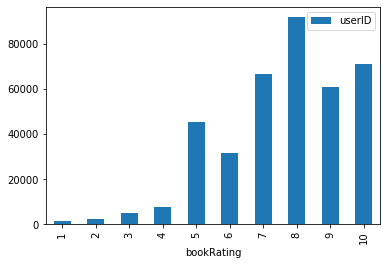

In [64]:
ratings_explicit.groupby('bookRating', as_index=False).count().plot(x='bookRating',y='userID', kind = 'bar')
plt.show()

In [65]:
print('\nThe bar plot shows that maximum number of users have given rating of 8 and \
least no of users have given rating of 1\n')


The bar plot shows that maximum number of users have given rating of 8 and least no of users have given rating of 1



### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [66]:
counts = (ratings_explicit['userID'].value_counts())
counts.head(3)

11676     6943
98391     5689
189835    1899
Name: userID, dtype: int64

In [67]:
ratings_explicit = ratings_explicit[ratings_explicit['userID'].isin(counts[counts >= 100].index)]

In [68]:
ratings_explicit['userID'].value_counts().min()

100

In [69]:
ratings_explicit.head(3)

,userID,ISBN,bookRating
1456,277427,002542730X,10
1458,277427,003008685X,8
1461,277427,0060006641,10


In [70]:
ratings_explicit.shape

(103269, 3)

In [71]:
print('\n',ratings_explicit.shape[0],'users have rated atleast 100 books\n')


 103269 users have rated atleast 100 books



### Transform data to surprise format

In [72]:
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate, train_test_split
from surprise import NormalPredictor

#Read the explicit rating scale and load the Dataset
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings_explicit, reader)

In [73]:
#Evaluating RMSE, MAE of Normal Predictor algorithm on 5 split(s)

cross_validate(NormalPredictor(), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.4515  2.4462  2.4525  2.4392  2.4599  2.4499  0.0069  
MAE (testset)     1.9510  1.9505  1.9600  1.9426  1.9638  1.9536  0.0075  
Fit time          0.12    0.14    0.14    0.16    0.17    0.14    0.02    
Test time         0.14    0.14    0.15    0.19    0.13    0.15    0.02    


{'test_rmse': array([2.4514936 , 2.44624642, 2.45249933, 2.43916483, 2.45988773]),
 'test_mae': array([1.95095652, 1.95052556, 1.96002607, 1.94255121, 1.9638047 ]),
 'fit_time': (0.12167477607727051,
  0.13962650299072266,
  0.13965845108032227,
  0.15658140182495117,
  0.16555571556091309),
 'test_time': (0.14062237739562988,
  0.13862967491149902,
  0.1495676040649414,
  0.18749785423278809,
  0.13367509841918945)}

### Points to Note:
1) Trainset is no longer a pandas dataframe. Rather, it's a specific datatypes defined by the Surprise library


2) UserID and ISBN in the pandas dataframe can contain any value (either string/integer etc). However, Trainset convert these raw ids into numeric indexes called as "inner id"


3) Methods are provided to convert rw id to inner id and vice verca

### SVD Based Recommendation System

### Split the above data into trainset and testset

In [74]:
trainset, testset = train_test_split(data, test_size=0.30)

### Explore trainset and testset

In [75]:
print(trainset.n_items, trainset.n_users, trainset.n_ratings)

50288 449 72288


In [76]:
print(trainset.rating_scale, trainset.global_mean)

(1, 10) 7.833070495794599


In [77]:
print(len(testset))

30981


In [78]:
testset[0:5]

[(94347, '0064409422', 9.0),
 (56399, '0671201581', 10.0),
 (177458, '0671009249', 3.0),
 (16795, '0671708635', 7.0),
 (114368, '0671728598', 5.0)]

### Import SVD from Surprise and fit on trainset

In [79]:
from surprise import SVD
from surprise import accuracy

In [80]:
svd_clf = SVD()
svd_clf.fit(trainset)

### Predict ratings for testset and check RMSE

In [81]:
predictions = svd_clf.test(testset)

In [82]:
predictions[0:5]

[Prediction(uid=94347, iid='0064409422', r_ui=9.0, est=7.0456421192260335, details={'was_impossible': False}),
 Prediction(uid=56399, iid='0671201581', r_ui=10.0, est=9.549672290741016, details={'was_impossible': False}),
 Prediction(uid=177458, iid='0671009249', r_ui=3.0, est=7.286684079718641, details={'was_impossible': False}),
 Prediction(uid=16795, iid='0671708635', r_ui=7.0, est=6.358196448483794, details={'was_impossible': False}),
 Prediction(uid=114368, iid='0671728598', r_ui=5.0, est=6.17569249081573, details={'was_impossible': False})]

In [83]:
accuracy.rmse(predictions)

RMSE: 1.5047


1.5047467698768564

### Generating top n recommendations for a user

In [84]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


In [85]:
#call top_n function for 10 recommendations for the users.

top_n = get_top_n(predictions, n=10)

In [86]:
# Print the top 10 recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

94347 ['0060392452', '0140186484', '0671727796', '0380729407', '067976657X', '0671636782', '0802130208', '0671496786', '0811212777', '0140049479']
56399 ['044050306X', '087923573X', '0399501487', '0451200829', '014044615X', '0451204530', '0575400048', '0853602115', '0553258478', '187143890X']
177458 ['0312971346', '0064400557', '0875421857', '0836218353', '0380708213', '0345307674', '0836218787', '1555837336', '0451180232', '0671774832']
16795 ['0440222656', '0151008116', '0345339703', '0802131786', '0553574086', '0811831620', '0525947299', '0553250426', '0060192704', '0515102636']
114368 ['0373484003', '0440404193', '0373835922', '0373835760', '0312979681', '0425183181', '0515114006', '0373835396', '0385505833', '0553576003']
235105 ['043935806X', '0440998050', '0892967714', '0440180295', '0515133876', '0449212602', '0345453433', '059043389X', '0345452534', '0399148639']
262998 ['0345404475', '0060925752', '0930289595', '0451191145', '0600571025', '0140274162', '0882669133', '01928336